In [2]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [3]:
def psi(g,e):
    return np.array([g, e])

#def pulse(t, Omega0, delPrime):
#    Omega = np.sqrt(Omega0**2 + delPrime**2)
#    
#    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
#             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse(t, Omega0, delta, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delta**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delta/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delta/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delta*t/2.0)*V1@U@V0

def rhoee(psi):
    return (abs(psi[1]))**2.0

def rhogg(psi):
    return (abs(psi[0]))**2.0

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

In [4]:
def hyperRamseyP(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def hyperRamseyM(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def HRerrSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    RhoeeP = rhoee(hyperRamseyP(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02))
    RhoeeM = rhoee(hyperRamseyM(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02))
    return RhoeeP - RhoeeM

In [5]:
def hyperRamseyPhaseJumpM(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def hyperRamseyPhaseJumpP(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def HRJumperrSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    RhoeeP = rhoee(hyperRamseyPhaseJumpP(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    RhoeeM = rhoee(hyperRamseyPhaseJumpM(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    return RhoeeP - RhoeeM

In [6]:
def hyperRamseyPhaseJump2M(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    pulse1 = pulse(t1/3.0, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t1/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@freeEvo@pi2PhaseInj@pulse2@pulse1@psi0

def hyperRamseyPhaseJump2P(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    pulse1 = pulse(t1/3.0, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t1/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@freeEvo@pi2PhaseInj@pulse2@pulse1@psi0

def HRJump2errSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    RhoeeP = rhoee(hyperRamseyPhaseJump2P(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    RhoeeM = rhoee(hyperRamseyPhaseJump2M(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    return RhoeeP - RhoeeM

In [27]:
def HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
    return HRerrSig(psi0, t1, T, t2, x0, x0+Delta, Omega01, Omega02) * HRerrSig(psi0, t1, T, t2, x1, x1+Delta, Omega01, Omega02) < 0

def HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
    return HRJumperrSig(psi0,t1,T,t2,x0,x0+Delta,Omega01,Omega02,Omega03)*HRJumperrSig(psi0,t1,T,t2,x1,x1+Delta,Omega01,Omega02,Omega03) < 0

def HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
    return HRJump2errSig(psi0,t1,T,t2,x0,x0+Delta,Omega01,Omega02,Omega03)*HRJump2errSig(psi0,t1,T,t2,x1,x1+Delta,Omega01,Omega02,Omega03) < 0

def error_bound(a, b, err):
    n = np.log((b - a) / err) / np.log(2)
    return int(np.ceil(n))

def HRfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, guess):
    #x0 = guess - np.abs(guess)*0.025 - 0.015/Omega02
    #x1 = guess + np.abs(guess)*0.025 + 0.015/Omega02
    x0 = guess - 0.1
    x1 = guess + 0.1
    #print(x0,x1)
    
    if not HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRerrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02)
        if -tol < y < tol:
            #print(Delta)
            return root_approx
        if HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HRJumpfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol, guess):
    #x0 = -0.1*Delta/(Omega01*T) - 0.25*np.abs(2.0*Delta/(Omega01*T)) - 0.01
    #x1 = -0.1*Delta/(Omega01*T) + 0.25*np.abs(2.0*Delta/(Omega01*T)) + 0.01
    x0 = guess - 0.00005
    x1 = guess + 0.00005
    #print(x0,x1)
    
    if not HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRJumperrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02, Omega03)
        if -tol < y < tol:
            return root_approx
        if HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HRJump2findRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol, guess):
    #x0 = -0.1*Delta/(Omega03*T) - 1.25*np.abs(2.0*Delta/(Omega03*T)) - 0.01
    #x1 = -0.1*Delta/(Omega03*T) + 1.25*np.abs(2.0*Delta/(Omega03*T)) + 0.01
    x0 = guess - 0.000001
    x1 = guess + 0.000001
    #print(x0,x1)
    
    if not HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRJump2errSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02, Omega03)
        if -tol < y < tol:
            return root_approx
        if HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1

In [28]:
def HRHeatSensb(q, pulse1, pulse2, Delta):
    psi0 = psi(0.0, 1.0)
    t1 = 10.0e-3             #s
    t2 = t1*(pulse2/pulse1)
    Omega01 = pulse1/t1
    Omega02 = Omega01*q
    T = 10.0*t1
    
    tol = 1.0e-10
    shift = 0.0

    pts = 100
    Deltas = np.linspace(0.0, Delta*Omega01, pts)
    for ii in range(pts):
        shift = HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, tol, shift)
        #print(shift)
        #print(Deltas[ii])
        
    if not isinstance(shift, float):
        return
    else:
        return shift
    
def HRJumpHeatSensb(q, Delta):
    psi0 = psi(0.0, 1.0)
    t1 = 10.0e-3
    T = 10*t1
    t2 = 3.0*t1
    Omega01 = np.pi/(2.0*t1)
    Omega02 = q*Omega01
    Omega03 = q*Omega01
    tol = 1.0e-10
    shift = 0.0

    pts = 100
    Deltas = np.linspace(0.0, Delta*Omega01, pts)
    for ii in range(pts):
        shift = HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol, shift)
        #print(shift)
        
    if not isinstance(shift, float):
        return
    else:
        return shift
    
def HRJump2HeatSensb(q, Delta):
    psi0 = psi(0.0, 1.0)
    t1 = 3.0*10.0e-3
    T = 100.0e-3
    t2 = t1/3.0
    Omega01 = 3.0*np.pi/(2.0*t1)
    Omega02 = Omega01
    Omega03 = q*Omega01
    tol = 1.0e-10
    shift = 0.0

    pts = 100
    Deltas = np.linspace(0.0, Delta*Omega01, pts)
    for ii in range(pts):
        shift = HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol, shift)
       
    if not isinstance(shift, float):
        return
    else:
        return shift

In [29]:
pts = 51
qPts = np.linspace(0.7, 1.0, pts)
heatSens1 = np.zeros(pts,)
heatSens3 = np.zeros(pts,)
heatSens5 = np.zeros(pts,)
heatSens7 = np.zeros(pts,)
heatSensJ = np.zeros(pts,)
heatSensJ2 = np.zeros(pts,)
Delta = 0.00001

for ii in range(pts):
    #heatSens1[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 1.0*np.pi/2.0, Delta)
    #heatSens3[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 3.0*np.pi/2.0, Delta)
    #heatSens5[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 5.0*np.pi/2.0, Delta)
    #heatSens7[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 7.0*np.pi/2.0, Delta)
    heatSensJ[ii] = HRJumpHeatSensb(qPts[ii], Delta)
    heatSensJ2[ii] = HRJump2HeatSensb(qPts[ii], Delta)
    #print(qPts[ii])

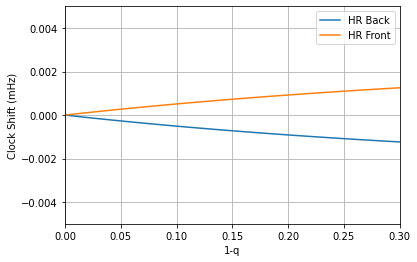

In [30]:
#plt.plot(1-qPts, heatSens1*100.0, label="$\pi/2$")
#plt.plot(1-qPts, heatSens3*100.0, label="$3\pi/2$")
#plt.plot(1-qPts, heatSens5*100.0, label="$5\pi/2$")
#plt.plot(1-qPts, heatSens7*100.0, label="$7\pi/2$")
plt.plot(1-qPts, heatSensJ*100.0, label="HR Back")
plt.plot(1-qPts, heatSensJ2*100.0, label="HR Front")
plt.xlabel("1-q")
plt.ylabel("Clock Shift (mHz)")
plt.ylim([-.5e-2, .5e-2])
plt.xlim([0.0, 0.3])
plt.grid()
plt.legend()
plt.show()

In [32]:
pts = 51
qPts = np.linspace(0.7, 1.0, pts)
heatSens1 = np.zeros(pts,)
heatSens3 = np.zeros(pts,)
heatSens5 = np.zeros(pts,)
heatSens7 = np.zeros(pts,)
heatSensJb = np.zeros(pts,)
heatSensJ2b = np.zeros(pts,)
Delta = 0.000001

for ii in range(pts):
    #heatSens1[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 1.0*np.pi/2.0, Delta)
    #heatSens3[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 3.0*np.pi/2.0, Delta)
    #heatSens5[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 5.0*np.pi/2.0, Delta)
    #heatSens7[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 7.0*np.pi/2.0, Delta)
    heatSensJb[ii] = HRJumpHeatSensb(qPts[ii], Delta)
    heatSensJ2b[ii] = HRJump2HeatSensb(qPts[ii], Delta)
    #print(qPts[ii])

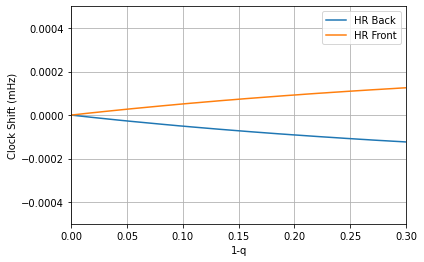

In [34]:
#plt.plot(1-qPts, heatSens1*100.0, label="$\pi/2$")
#plt.plot(1-qPts, heatSens3*100.0, label="$3\pi/2$")
#plt.plot(1-qPts, heatSens5*100.0, label="$5\pi/2$")
#plt.plot(1-qPts, heatSens7*100.0, label="$7\pi/2$")
plt.plot(1-qPts, heatSensJb*100.0, label="HR Back")
plt.plot(1-qPts, heatSensJ2b*100.0, label="HR Front")
plt.xlabel("1-q")
plt.ylabel("Clock Shift (mHz)")
plt.ylim([-.5e-3, .5e-3])
plt.xlim([0.0, 0.3])
plt.grid()
plt.legend()
plt.show()

In [35]:
pts = 51
qPts = np.linspace(0.7, 1.0, pts)
heatSens1 = np.zeros(pts,)
heatSens3 = np.zeros(pts,)
heatSens5 = np.zeros(pts,)
heatSens7 = np.zeros(pts,)
heatSensJc = np.zeros(pts,)
heatSensJ2c = np.zeros(pts,)
Delta = 0.0000001

for ii in range(pts):
    #heatSens1[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 1.0*np.pi/2.0, Delta)
    #heatSens3[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 3.0*np.pi/2.0, Delta)
    #heatSens5[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 5.0*np.pi/2.0, Delta)
    #heatSens7[ii] = HRHeatSensb(qPts[ii], np.pi/2.0, 7.0*np.pi/2.0, Delta)
    heatSensJc[ii] = HRJumpHeatSensb(qPts[ii], Delta)
    heatSensJ2c[ii] = HRJump2HeatSensb(qPts[ii], Delta)
    #print(qPts[ii])